#Self Organizing Map

##Installing MiniSom Package

In [ ]:
!pip install minisom

## Importing the libraries


In [ ]:
import numpy as np
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('creditcard_sampled.csv')
X = dataset.iloc[:, np.r_[:21, 29]].values # Select 'Time','Amount', and the first 20 PCs
y = dataset.iloc[:, -1].values

## Feature Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [ ]:
from minisom import MiniSom
som = MiniSom(x=20, y=20, input_len= 22, sigma= 0.5, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 400000)

##Visualizing the results


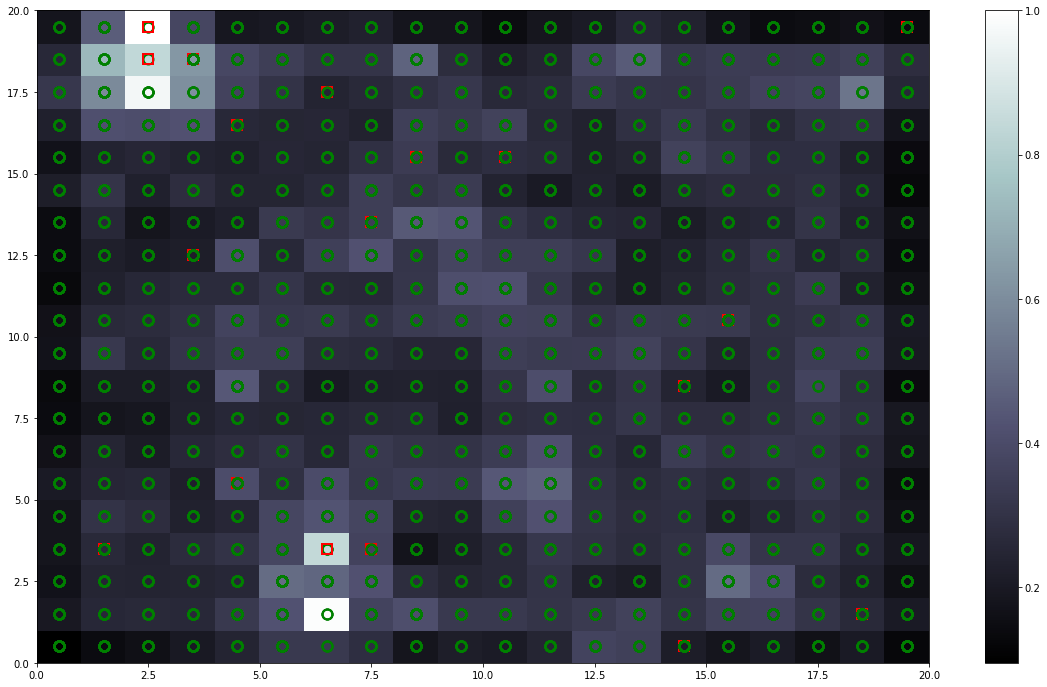

In [ ]:
# Enlarging plot size
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['g', 'r']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,18)],
                         mappings[(2, 17)],
                         mappings[(2,18)],
                         mappings[(2,19)],
                         mappings[(6,1)],
                         mappings[(6,3)]
                         ), axis = 0)
frauds.shape

(62, 22)

##Calculating sensitivity



### Number of true frauds

In [ ]:
X1=X[y>0, :]
X1.shape[0]

49

### Number of correctly predicted frauds

In [ ]:
count=0
for i in range(frauds.shape[0]):
  for j in range(X1.shape[0]):
    if (frauds[i,:]== X1[j,:]).all():
      count=count+1
print(count)

33


### Printing the sensitivity

In [ ]:
print('Sensitivity is {0:.2f}%'.format(count/X1.shape[0]*100))

Sensitivity is 67.35%
